# FBI Gun Data Analysis

The data contains  of the FBI Gun data. This data has been collected since 1998. Another dataset is the U.S. Census Data. This data shows different specifica for every state of the USA. The Census data for 2010 and 2016 has been provided for the analysis.

The main part of the FBI Gun Data analysis will focus on the 2016 data.

The analysis is focused on the FBI gun data. In the analysis the following questions will be answered

> 1) Figure out the overall development of total guns in the USA
>
> 2) States with the most guns (in total and dependend on the population)
>
> 3) States with the least guns (in total and dependend on the population)
>
> 4) Main drivers of total guns in a state

## Table of Contents
<ul>
<li><a href="#import">Import Packages and Datasets</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='import'></a>
## Importing packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Importing datasets

In [4]:
gun_data = pd.read_excel('gun_data.xlsx')
census = pd.read_csv('U.S. Census Data.csv')

In [5]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [6]:
census.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [7]:
# Botton data of the census data contains information for the other rows
census.tail()['Fact Note']

80               Footnote on this item in place of data
81                                        Not available
82      Suppressed; does not meet publication standards
83                                       Not applicable
84    Value greater than zero but less than half uni...
Name: Fact Note, dtype: object

<a id='wrangling'></a>
## Data Wrangling

### Gun Data

Check the Gun Data

In [8]:
# Several NaN values in the dataframe (Hashcode can be removed if nessecary)
# gun_data.isna().sum()

In [9]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [10]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [11]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Plotting of most important features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b8d4128>,
      dtype=object)

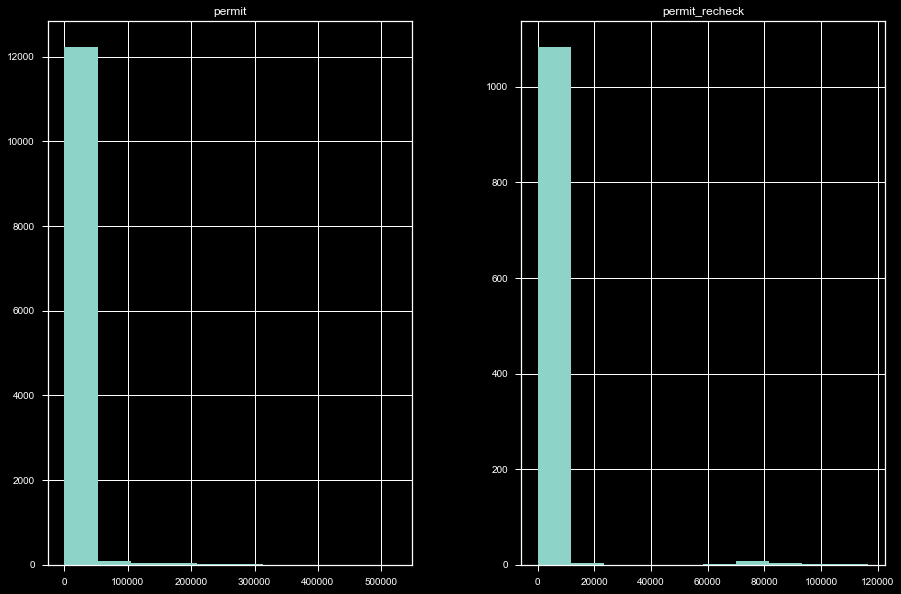

In [72]:
gun_data[['permit', 'permit_recheck']].hist(figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a2c6828>,
      dtype=object)

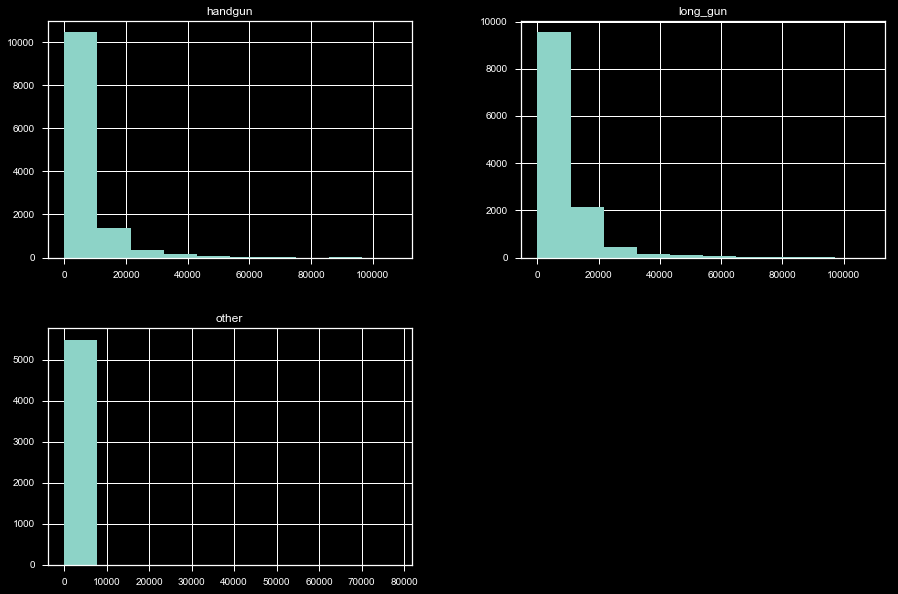

In [71]:
gun_data[['handgun', 'long_gun', 'other']].hist(figsize = (15,10))

In [14]:
gun_data.state.nunique()

55

In [15]:
# The "special states" like District of Columbia will not be integrated into other states,
# Therefore these states are not considered when the data is combined with the census data set
gun_data.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

Clean the Gun Data

In [16]:
# Get new dataframe that contains the overall data, not specified to individual states

# Splitting the months into months and years
gun_data['year'], gun_data['ind_month'] = gun_data['month'].str.split('-', 1).str

# Grouping the data by the year
gun_data_years = gun_data.copy().groupby('year').sum()
gun_data_years.reset_index(inplace = True)

In [17]:
# Extrapolate the sales of 2017 to a full year (2017 is just given until september)
gun_data_years.at[19, 'totals'] = (gun_data_years[gun_data_years['year'] == '2017']['totals'])/9*12

# Change 2017 to 2017e
gun_data_years.at[19, 'year'] = '2017e'

In [18]:
# Check if values are still correct
gun_data_years['permit'].sum() == gun_data['permit'].sum()

True

In [19]:
gun_data_years.head(1)

,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,1998,78169.0,0.0,219999.0,582791.0,0.0,8720,2219.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,891898


In [20]:
gun_data_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
year                         20 non-null object
permit                       20 non-null float64
permit_recheck               20 non-null float64
handgun                      20 non-null float64
long_gun                     20 non-null float64
other                        20 non-null float64
multiple                     20 non-null int64
admin                        20 non-null float64
prepawn_handgun              20 non-null float64
prepawn_long_gun             20 non-null float64
prepawn_other                20 non-null float64
redemption_handgun           20 non-null float64
redemption_long_gun          20 non-null float64
redemption_other             20 non-null float64
returned_handgun             20 non-null float64
returned_long_gun            20 non-null float64
returned_other               20 non-null float64
rentals_handgun              20 non-null float64
rentals_long_gun  

In [21]:
gun_data_years.columns

Index(['year', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

Gun Data just in the year 2016

In [22]:
# Get the gun data for every year for every state
gun_data_state = gun_data.groupby(['year', 'state']).sum()
gun_data_state.reset_index(inplace = True)

In [23]:
# Focus on the 2016 data
gun_2016 = gun_data_state.query('year == "2016"').copy()
gun_2016.drop(['year'], axis = 1, inplace = True)
gun_2016.reset_index(drop = True, inplace = True)
gun_2016.head(1)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947


In [24]:
gun_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 26 columns):
state                        55 non-null object
permit                       55 non-null float64
permit_recheck               55 non-null float64
handgun                      55 non-null float64
long_gun                     55 non-null float64
other                        55 non-null float64
multiple                     55 non-null int64
admin                        55 non-null float64
prepawn_handgun              55 non-null float64
prepawn_long_gun             55 non-null float64
prepawn_other                55 non-null float64
redemption_handgun           55 non-null float64
redemption_long_gun          55 non-null float64
redemption_other             55 non-null float64
returned_handgun             55 non-null float64
returned_long_gun            55 non-null float64
returned_other               55 non-null float64
rentals_handgun              55 non-null float64
rentals_long_gun  

### Census Data

Just the 2016 of the census data is needed. Therefore the Fact column is filtered for the key word "2016"

In [25]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [26]:
# Get all data that contain the word "2016", No manual filtering necessary

list_2016 = []

# Rows after number 64 are not important for the analysis any more, 
# these rows just contain informating for the other rows (See census.tail() function above)

for i in range (0, 64):
    if '2016' in census.iloc[i][0]:
        list_2016.append(i)

In [27]:
# Manual adjustment of the automatically filtered rows

list_2016.remove(1) #Remove row since it is about the development from 2010 to 2016
list_2016.remove(2) #Remove row since it is about the development from 2010 to 2016

In [28]:
# Cleaning and reset of index

census_2016 = (census.iloc[list_2016]).copy()
census_2016.reset_index(drop = True, inplace = True)

# Drop the fact Note columnn since it does not contain important information for the analysis
census_2016.drop(['Fact Note'], axis = 1, inplace = True)

census_2016.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


Transpose the dataframe so that the states are listed in the columns

In [29]:
cs_2016 = census_2016.set_index('Fact').T.reset_index()
cs_2016.head(1)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
0,Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"


In [30]:
cs_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
index                                                                                50 non-null object
Population estimates, July 1, 2016,  (V2016)                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                               50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                              50 non-null object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                          50 non-null object
Female persons, percent,  July 1, 2016,  (V2016)                                     50 non-null object
White alone, percent, July 1, 2016,  (V2016)                                         50 non-null object
Black or African American alone, percent, July 1, 2016,  (V2016)                     50 non-null object
American Indian and Alaska Native alone, percent, July 1, 2016,  

Adjust the column headers

In [31]:
# Shorten the column headers to the most important information

columns_headers = []

for i in range (0, len(cs_2016.columns)):
    
    # find the comma in the headers and select everything up to the comma of the current header
    columns_headers.append(cs_2016.columns.tolist()[i][0:cs_2016.columns.tolist()[i].find(',')]) 

In [32]:
# Manual adjustments of column headers

# Rename the first column header in "State"
columns_headers[0] = 'State'

# Rename that column because of similarty to other column name
columns_headers[13] = 'White alone, not Hispanic or Latino'

In [33]:
# Replacing the colun headers of the DataFrame with the new names
cs_2016.columns = columns_headers
# cs_2016.head(1)

Clean the data

In [34]:
# Clean data types
cs_2016['Population estimates'] = cs_2016['Population estimates'].str.replace(',', '').astype(int)
cs_2016['Housing units'] = cs_2016['Housing units'].str.replace(',', '').astype(int)
cs_2016['Building permits'] = cs_2016['Building permits'].str.replace(',', '').astype(int)

In [35]:
# Rows 30 to 42 are already clean. Therefore splitting the rows into two datasets
cs_to_clean = pd.concat([cs_2016.iloc[:30], cs_2016.iloc[42:]])
cs_to_clean_2 = cs_2016.iloc[30:42]

In [36]:
# Clean and change type of cs_to_clean

for i in columns_headers[2:14]:
    
    # Z value in the dataset are greater than zero but less than half unit of measure shown, therefore rounded to 0
    cs_to_clean[i] = cs_to_clean[i].str.replace('Z', '0')
    # Replace the % with '' in all Percentage columns
    cs_to_clean[i] = cs_to_clean[i].str.replace('%', '').astype(float)
    # Devide all % columns by 100 to get percentages
    cs_to_clean[i] = cs_to_clean[i]/100

In [37]:
# Change data type fo cs_to_clean_2
for i in columns_headers[2:14]:
    cs_to_clean_2[i] = cs_to_clean_2[i].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Combining the datasets
cs_2016_cleaned = pd.concat([cs_to_clean, cs_to_clean_2])

# Sorting the values so that the order is the same as before the cleaning process
cs_2016_cleaned.sort_values(by = 'State', inplace = True)

# Display cs_2016_cleaned
cs_2016_cleaned.head(1)

,State,Population estimates,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino",Housing units,Building permits
0,Alabama,4863300,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185,15001


Checking if the cleaning and concating was successful. *(Hashcode can be removed if nessecary)*

In [64]:
cs_2016_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
State                                               50 non-null object
Population estimates                                50 non-null int64
Persons under 5 years                               50 non-null float64
Persons under 18 years                              50 non-null float64
Persons 65 years and over                           50 non-null float64
Female persons                                      50 non-null float64
White alone                                         50 non-null float64
Black or African American alone                     50 non-null float64
American Indian and Alaska Native alone             50 non-null float64
Asian alone                                         50 non-null float64
Native Hawaiian and Other Pacific Islander alone    50 non-null float64
Two or More Races                                   50 non-null float64
Hispanic or Latino                  

In [40]:
# cs_2016['Population estimates'].sum() == cs_2016_cleaned['Population estimates'].sum()
# cs_2016['State'] == cs_2016_cleaned['State']

Plotting most important features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d26d9e8>,
      dtype=object)

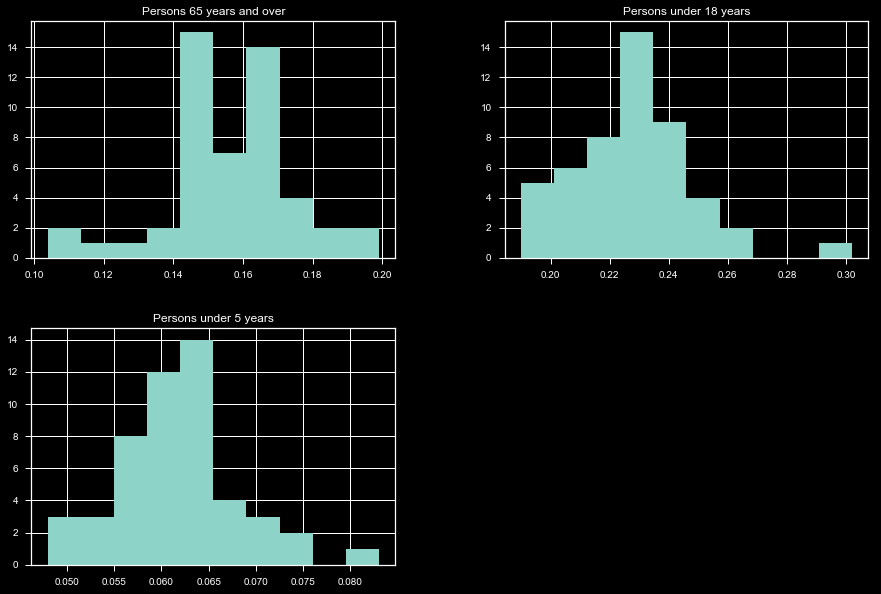

In [73]:
cs_2016_cleaned[['Persons under 5 years', 'Persons under 18 years', 'Persons 65 years and over']].hist(figsize = (15,10))

<a id='eda'></a>
## Explorative Data Analysis

Explore the gun dataset and development of guns

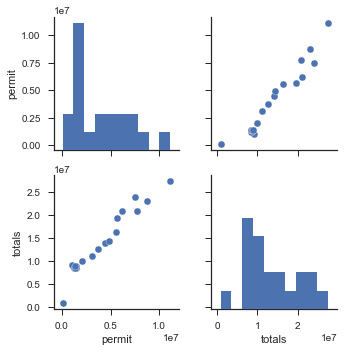

In [41]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(gun_data_years[['year', 'permit', 'totals']])

Correlation between the permits and totals can be seen in the figure above

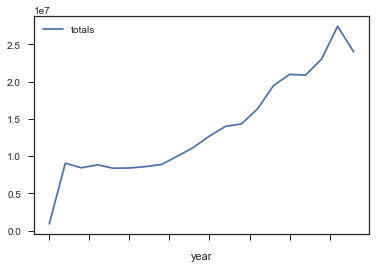

In [42]:
gun_data_years.plot(x = 'year', y = 'totals')

The number of guns rose over the last years

Focus only on the 2016 data

In [43]:
# Get the 25% sates with the most weapons

gun_2016_most_perc = gun_2016[gun_2016['totals'] > np.percentile(gun_2016['totals'], 75)]
print('States with the most guns: ', gun_2016_most_perc['state'].tolist())

# Add a break
print ()

# Get the 25% sates with the least weapons
gun_2016_least_perc = gun_2016[gun_2016['totals'] < np.percentile(gun_2016['totals'], 25)]
print('States with the least guns: ', gun_2016_least_perc['state'].tolist())

States with the most guns:  ['Alabama', 'California', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Minnesota', 'Missouri', 'Ohio', 'Pennsylvania', 'Tennessee', 'Texas', 'Washington']

States with the least guns:  ['Alaska', 'Delaware', 'District of Columbia', 'Guam', 'Hawaii', 'Maine', 'Mariana Islands', 'Nebraska', 'North Dakota', 'Puerto Rico', 'Rhode Island', 'Vermont', 'Virgin Islands', 'Wyoming']


In [44]:
# Get to 10 states with most and least guns

gun_2016_most = gun_2016.sort_values(by = 'totals', ascending = False).head(10)
print('States with the most guns: ', gun_2016_most['state'].tolist())

# Add a break
print ()

gun_2016_least = gun_2016.sort_values(by = 'totals', ascending = False).tail(10)
print('States with the least guns: ', gun_2016_least['state'].tolist())

States with the most guns:  ['Kentucky', 'California', 'Illinois', 'Texas', 'Indiana', 'Florida', 'Pennsylvania', 'Ohio', 'Tennessee', 'Washington']

States with the least guns:  ['Wyoming', 'Delaware', 'Vermont', 'Rhode Island', 'Hawaii', 'Puerto Rico', 'Guam', 'Virgin Islands', 'District of Columbia', 'Mariana Islands']


 Merging the Gun Data and the Census Data

In [45]:
df_2016 = cs_2016_cleaned.merge(gun_2016, left_on = 'State', right_on = 'state')

# Drop columns that are not considered in the further analysis
df_2016.drop(['Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone', 'Two or More Races',
       'Hispanic or Latino', 'White alone, not Hispanic or Latino', 'state', 'permit',
       'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin',
       'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other',
       'redemption_handgun', 'redemption_long_gun', 'redemption_other',
       'returned_handgun', 'returned_long_gun', 'returned_other',
       'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1, inplace = True)

In [46]:
# Get to 10 states with most and least guns in percentages of population

df_2016['Gun_percentage'] = df_2016['totals'] / df_2016['Population estimates']

# Get to 10 states with most and least guns in percentages
gun_2016_percentages_most = df_2016.sort_values(by = 'Gun_percentage', ascending = False).head(10)
print('States with the most guns: ', gun_2016_percentages_most['State'].tolist())

# Add a break
print ()

gun_2016_percentages_least = df_2016.sort_values(by = 'totals', ascending = False).tail(10)
print('States with the least guns: ', gun_2016_percentages_least['State'].tolist())

States with the most guns:  ['Kentucky', 'Indiana', 'Illinois', 'West Virginia', 'Montana', 'South Dakota', 'Alabama', 'New Hampshire', 'Alaska', 'Minnesota']

States with the least guns:  ['South Dakota', 'Maine', 'Nebraska', 'Alaska', 'North Dakota', 'Wyoming', 'Delaware', 'Vermont', 'Rhode Island', 'Hawaii']


In [47]:
df_2016.head(1)

,State,Population estimates,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Housing units,Building permits,totals,Gun_percentage
0,Alabama,4863300,0.06,0.226,0.161,0.516,0.693,2230185,15001,616947,0.126858


In [48]:
df_2016.corr()

,Population estimates,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Housing units,Building permits,totals,Gun_percentage
Population estimates,1.000000,-0.000040,0.028916,-0.185680,0.224346,-0.171441,0.993921,0.844697,0.605044,-0.102701
Persons under 5 years,-0.000040,1.000000,0.933638,-0.728141,-0.554454,-0.107755,-0.032358,0.118944,0.022746,0.052451
Persons under 18 years,0.028916,0.933638,1.000000,-0.765433,-0.406481,-0.027480,-0.003099,0.150088,0.065580,0.063601
Persons 65 years and over,-0.185680,-0.728141,-0.765433,1.000000,0.391080,0.170049,-0.140977,-0.210323,-0.128570,-0.018056
Female persons,0.224346,-0.554454,-0.406481,0.391080,1.000000,-0.221465,0.261608,0.136346,0.144967,-0.068164
White alone,-0.171441,-0.107755,-0.027480,0.170049,-0.221465,1.000000,-0.169284,-0.120394,0.030178,0.223479
Housing units,0.993921,-0.032358,-0.003099,-0.140977,0.261608,-0.169284,1.000000,0.850415,0.608313,-0.099464
Building permits,0.844697,0.118944,0.150088,-0.210323,0.136346,-0.120394,0.850415,1.000000,0.505704,-0.107218
totals,0.605044,0.022746,0.065580,-0.128570,0.144967,0.030178,0.608313,0.505704,1.000000,0.686741
Gun_percentage,-0.102701,0.052451,0.063601,-0.018056,-0.068164,0.223479,-0.099464,-0.107218,0.686741,1.000000


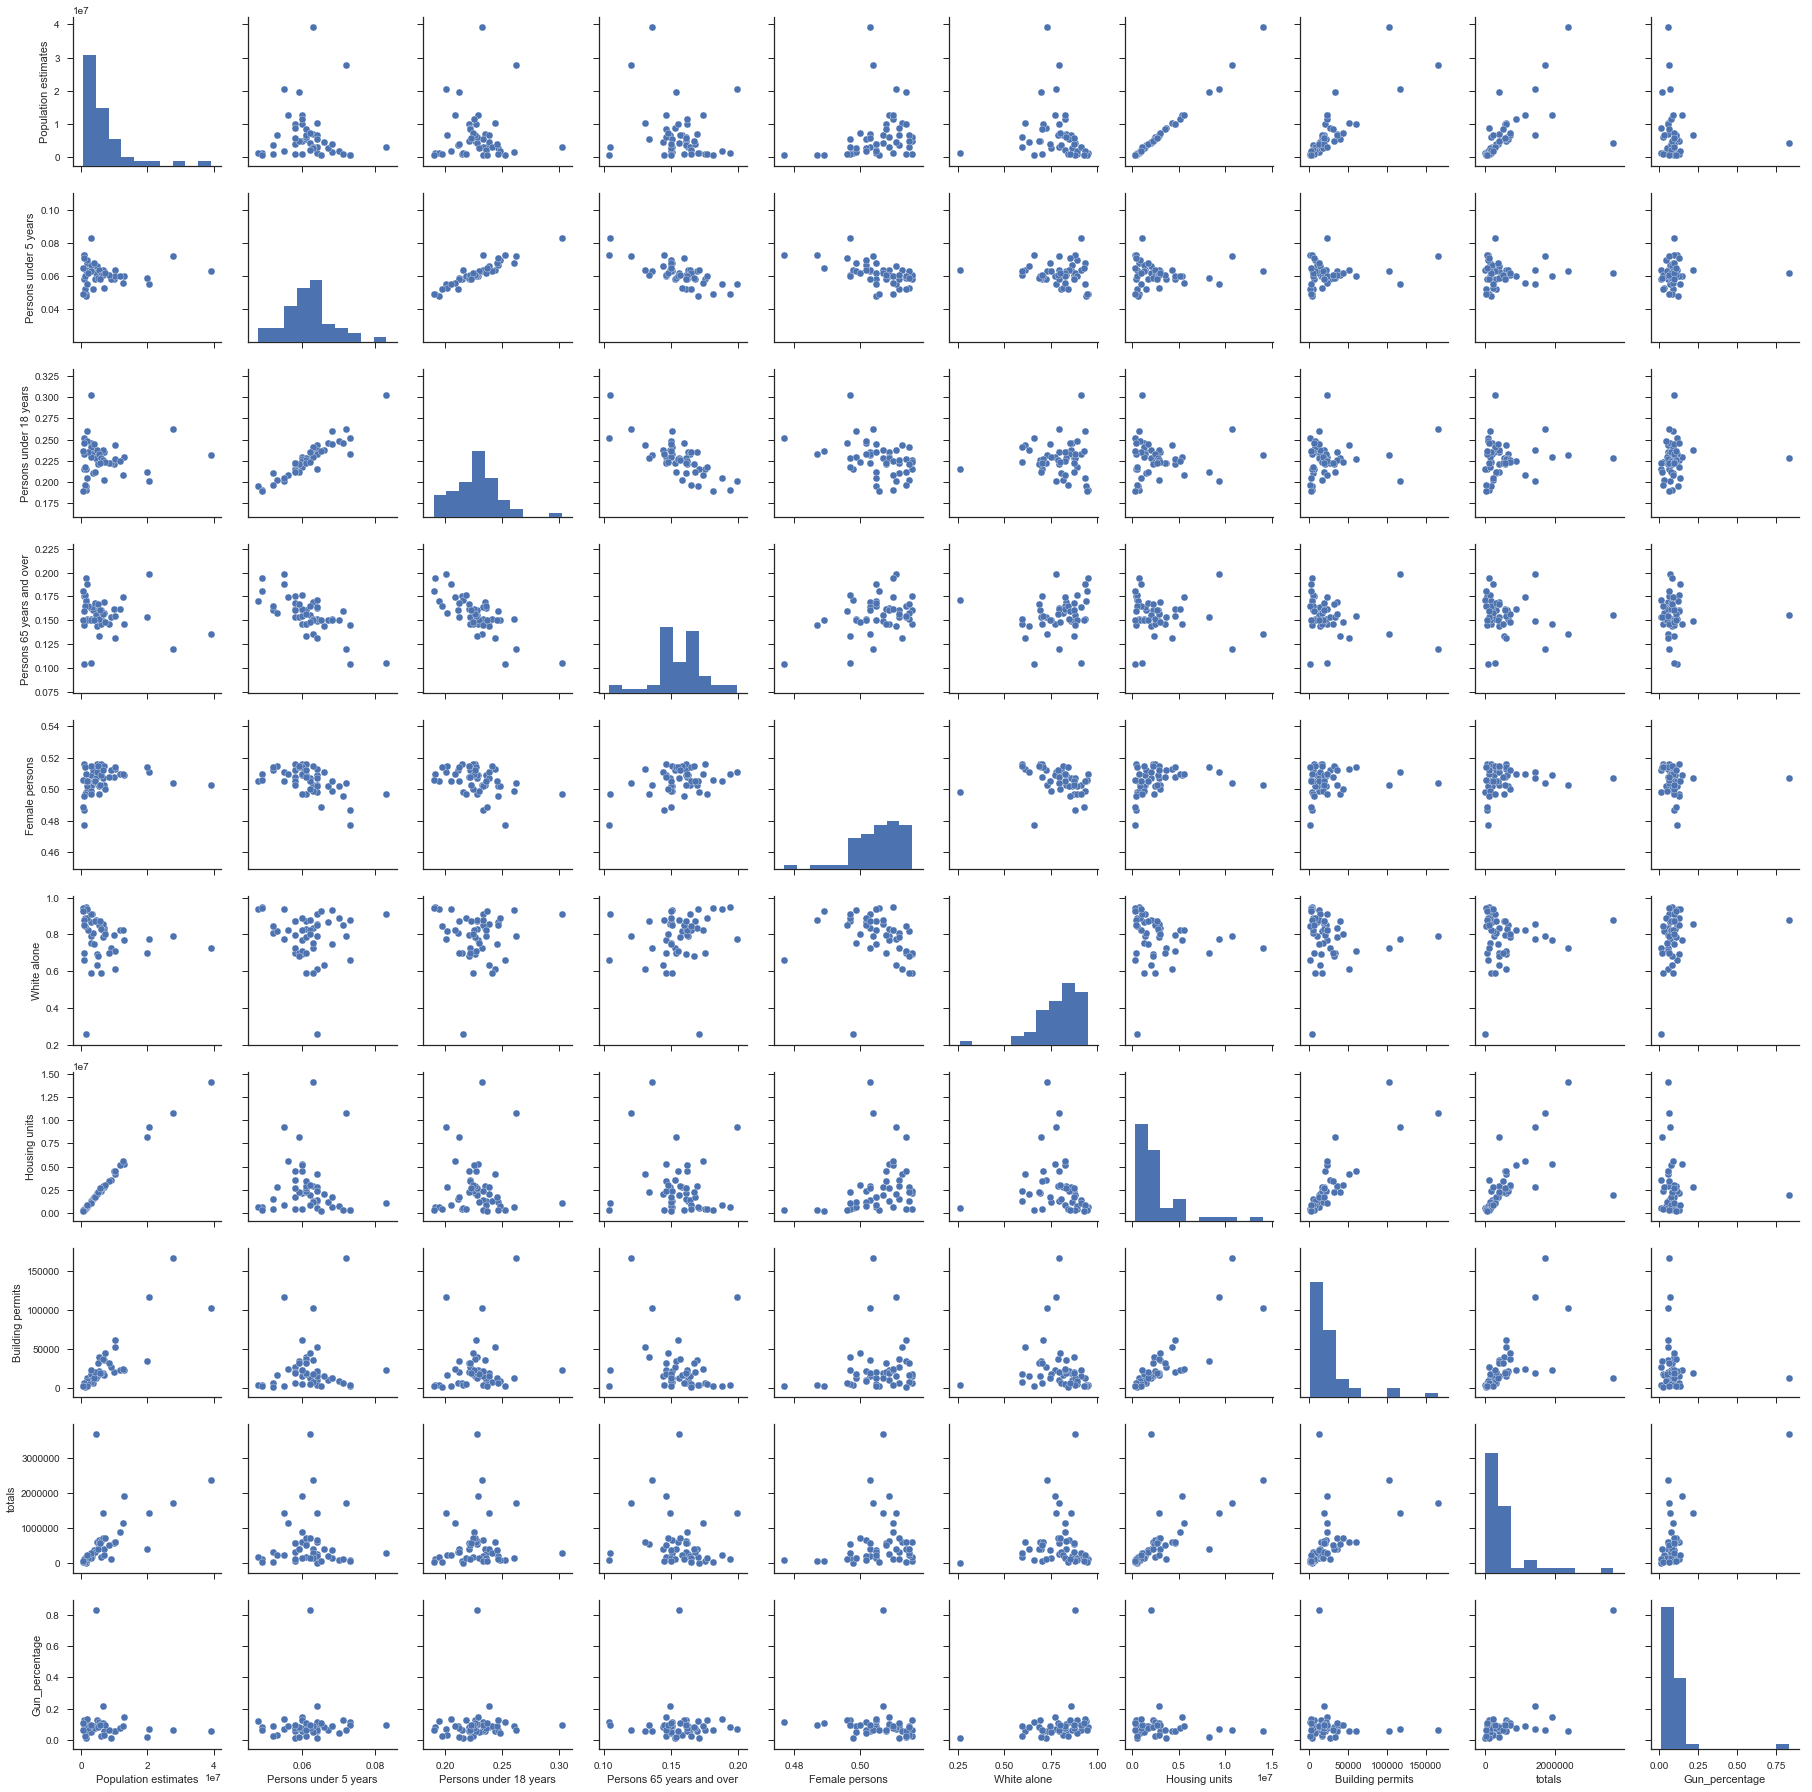

In [49]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_2016)

The correlation between the guns and demographic measuers is very low. Housing and total population seems to have a high impact on the guns in a state

<a id='conclusion'></a>
## Conclusion

### Question 1: Figure out the overall development of total guns in the USA

     year    totals
0    1998    891898
1    1999   9043747
2    2000   8427096
3    2001   8820045
4    2002   8367069
5    2003   8402244
6    2004   8579891
7    2005   8867055
8    2006   9993057
9    2007  11162272
10   2008  12692985
11   2009  13984953
12   2010  14320489
13   2011  16336732
14   2012  19463832
15   2013  20966704
16   2014  20860241
17   2015  23026288
18   2016  27425512
19  2017e  23987370


Text(0,0.5,'Total Guns USA')

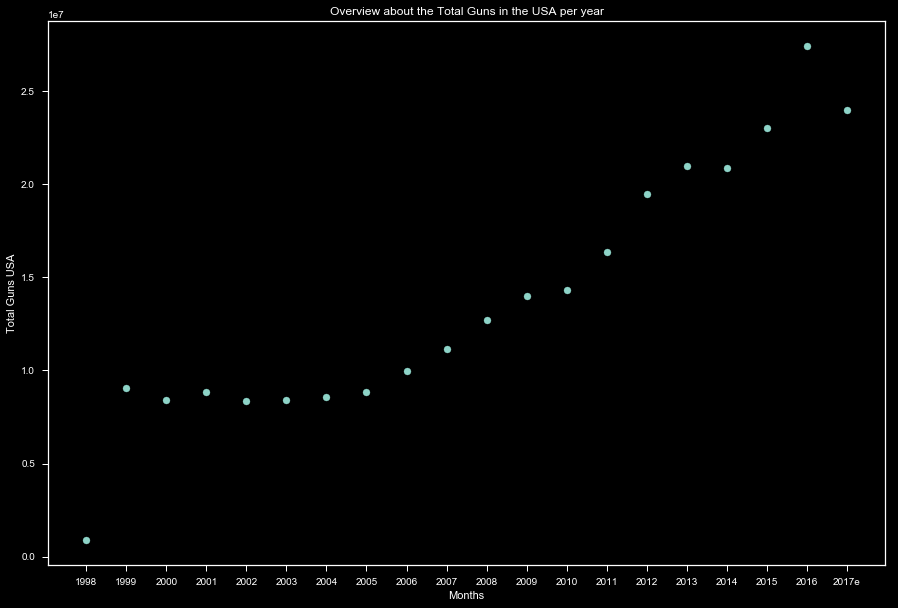

In [78]:
# Print the overveiw of the total guns in the USA in the different years

# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print(gun_data_years[['year', 'totals']])

plt.scatter(x = 'year', y = 'totals', data = gun_data_years)
plt.title('Overview about the Total Guns in the USA per year')
plt.xlabel('Months')
plt.ylabel('Total Guns USA')

In [51]:
print('Total number of guns in 2016 are: ', gun_2016['totals'].sum())
print('Total population in 2016 is: ', df_2016['Population estimates'].sum())
print()
print('Gun quota in 2016 is: ', (gun_2016['totals'].sum()/df_2016['Population estimates'].sum()))

Total number of guns in 2016 are:  27425512
Total population in 2016 is:  322446343

Gun quota in 2016 is:  0.08505449850922948


The number of guns in the USA is increasing exponentially since 2004. The percentage that a person in the USA has a gun is about 8.5%.

### Question 2: States with the most guns (in total and dependend on the population)

           state   totals
18      Kentucky  3676847
4     California  2377167
14      Illinois  1924070
46         Texas  1721726
15       Indiana  1436725
9        Florida  1435340
40  Pennsylvania  1143220
37          Ohio   875724
45     Tennessee   714774
51    Washington   713996


Text(0,0.5,'Total Guns')

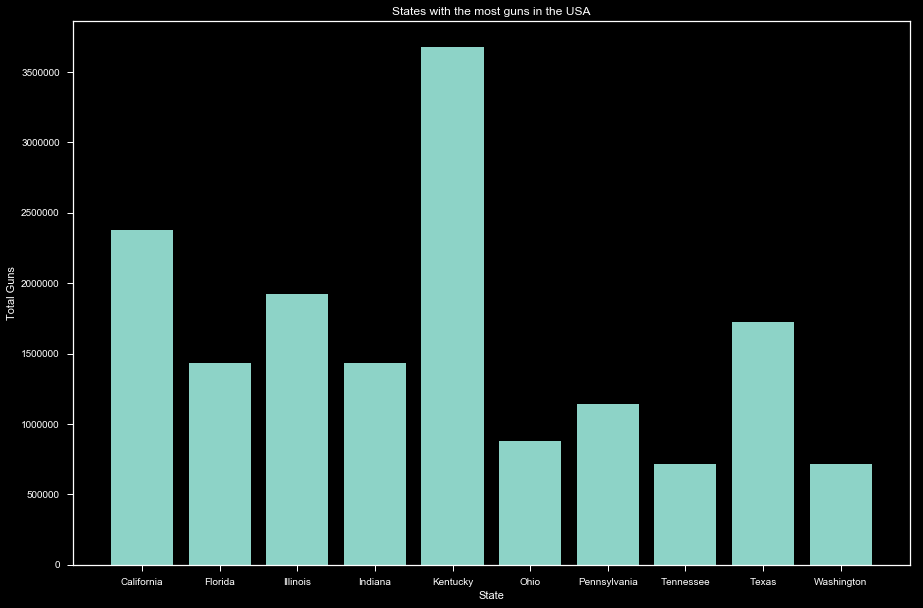

In [81]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print(gun_2016_most[['state', 'totals']])

plt.bar(x = 'state', height = 'totals', data = gun_2016_most)
plt.title('States with the most guns in the USA')
plt.xlabel('State')
plt.ylabel('Total Guns')

The states with the highest number of guns is Kentucky, California and Ilinois

            State   totals
16       Kentucky  3676847
13        Indiana  1436725
12       Illinois  1924070
47  West Virginia   242350
25        Montana   136337
40   South Dakota   111921
0         Alabama   616947
28  New Hampshire   165164
1          Alaska    87647
22      Minnesota   651599


Text(0,0.5,'Gun_percentage')

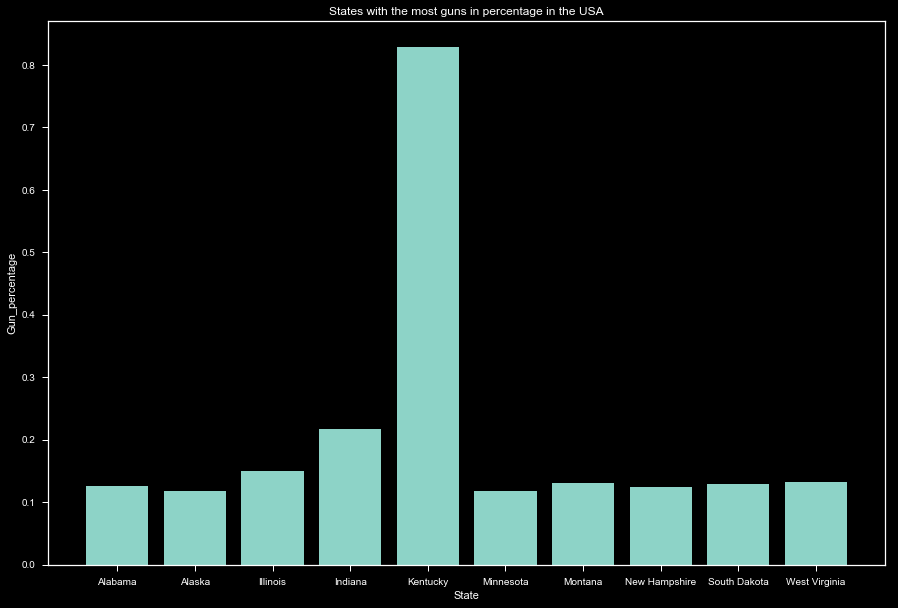

In [84]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print(gun_2016_percentages_most[['State', 'totals']])

plt.bar(x = 'State', height = 'Gun_percentage', data = gun_2016_percentages_most)
plt.title('States with the most guns in percentage in the USA')
plt.xlabel('State')
plt.ylabel('Gun_percentage')

Kentucky has highest number of total weapons as well as the highest percentage of guns per population. More than 80% of the people in Kentucky own a gun.

### Question 3: States with the least guns (in total and dependend on the population)

                   state  totals
54               Wyoming   63594
7               Delaware   59430
48               Vermont   39417
42          Rhode Island   27758
12                Hawaii   16681
41           Puerto Rico   15861
11                  Guam    2123
49        Virgin Islands    1087
8   District of Columbia     875
21       Mariana Islands      17


Text(0,0.5,'Total Guns')

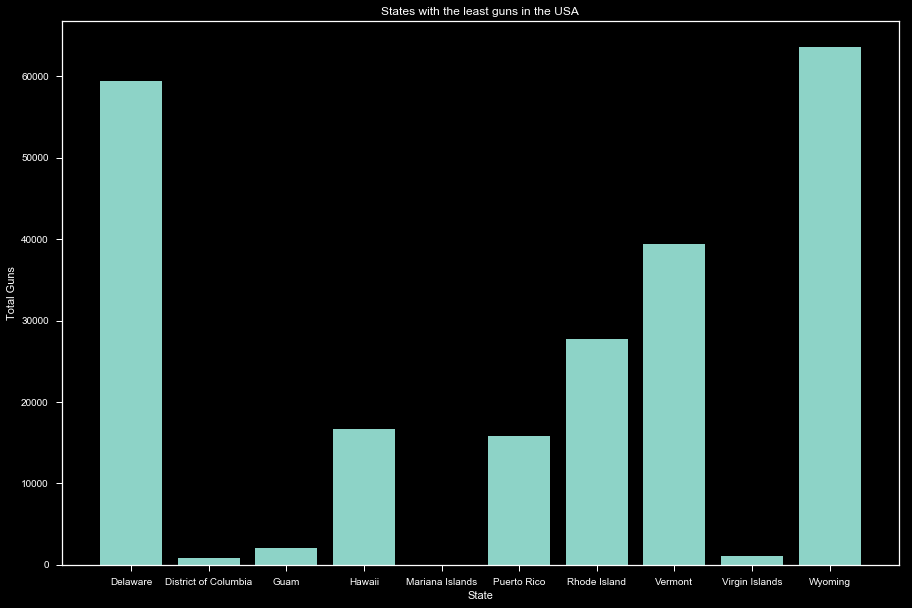

In [85]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print(gun_2016_least[['state', 'totals']])

plt.bar(x = 'state', height = 'totals', data = gun_2016_least)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('States with the least guns in the USA')
plt.xlabel('State')
plt.ylabel('Total Guns')

The smaller states have a have lower number of guns

           State  totals
40  South Dakota  111921
18         Maine  111582
26      Nebraska   88663
1         Alaska   87647
33  North Dakota   72036
49       Wyoming   63594
7       Delaware   59430
44       Vermont   39417
38  Rhode Island   27758
10        Hawaii   16681


Text(0,0.5,'Gun_percentage')

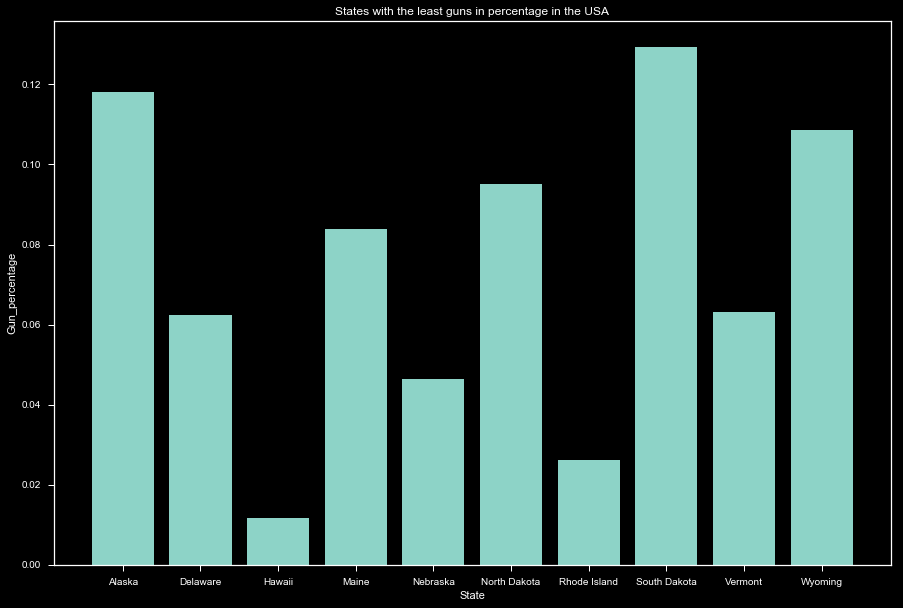

In [86]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print(gun_2016_percentages_least[['State', 'totals']])

plt.bar(x = 'State', height = 'Gun_percentage', data = gun_2016_percentages_least)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('States with the least guns in percentage in the USA')
plt.xlabel('State')
plt.ylabel('Gun_percentage')

Hawaii has the lowest percentage of guns. Less than 2%.

### Question 4: Main drivers of total guns in a state

Correlation betwen Population and guns are:  0.6050444754348568


Text(0,0.5,'Total Guns')

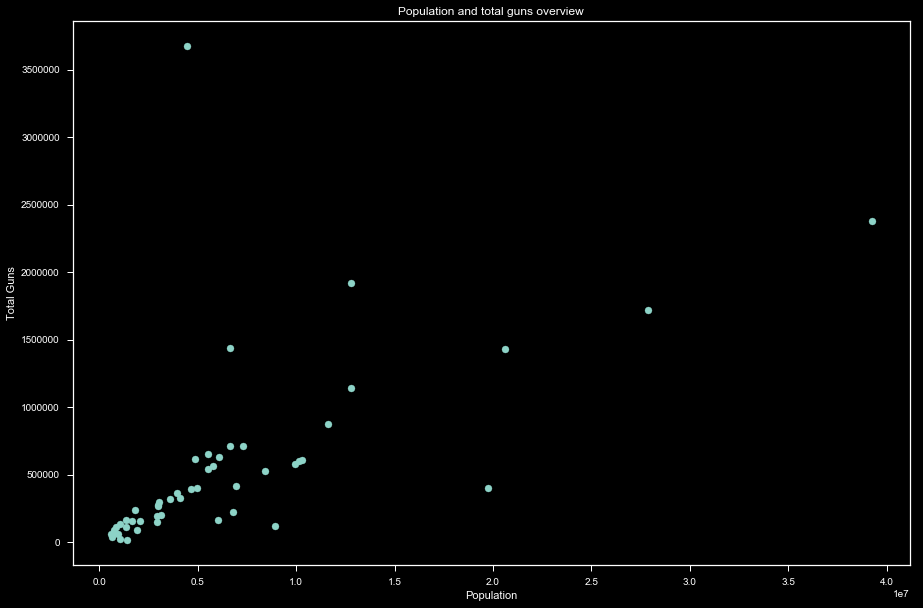

In [102]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print('Correlation betwen population and guns are: ', df_2016.corr()['Population estimates']['totals'])

plt.scatter(x = 'Population estimates', y = 'totals', data = df_2016)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('Population and total guns overview')
plt.xlabel('Population')
plt.ylabel('Total Guns')

Correlation betwen Housing units and guns are:  0.6083132558308046


Text(0,0.5,'Total Guns')

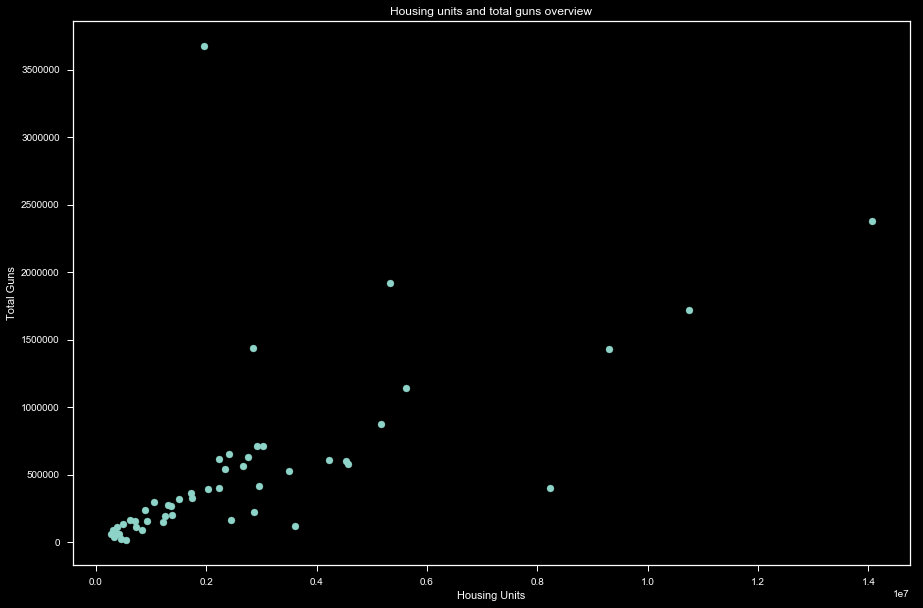

In [103]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print('Correlation betwen housing units and guns are: ', df_2016.corr()['Housing units']['totals'])

plt.scatter(x = 'Housing units', y = 'totals', data = df_2016)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('Housing units and total guns overview')
plt.xlabel('Housing Units')
plt.ylabel('Total Guns')

Correlation betwen Building permits and guns are:  0.5057040305579711


Text(0,0.5,'Total Guns')

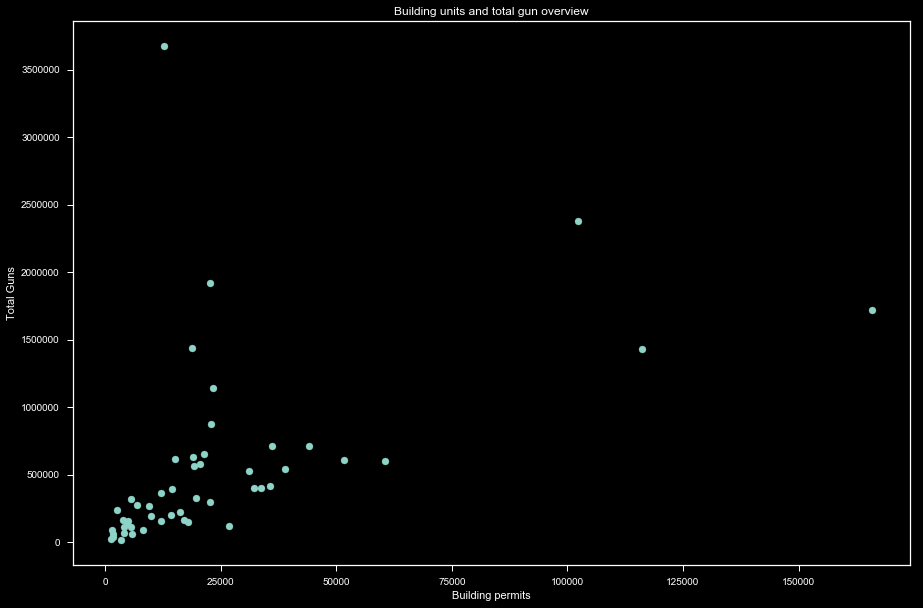

In [104]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print('Correlation betwen building permits and guns are: ', df_2016.corr()['Building permits']['totals'])

plt.scatter(x = 'Building permits', y = 'totals', data = df_2016)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('Building units and total gun overview')
plt.xlabel('Building permits')
plt.ylabel('Total Guns')

Correlation betwen females and guns are:  0.14496696043487606


Text(0,0.5,'Total Guns')

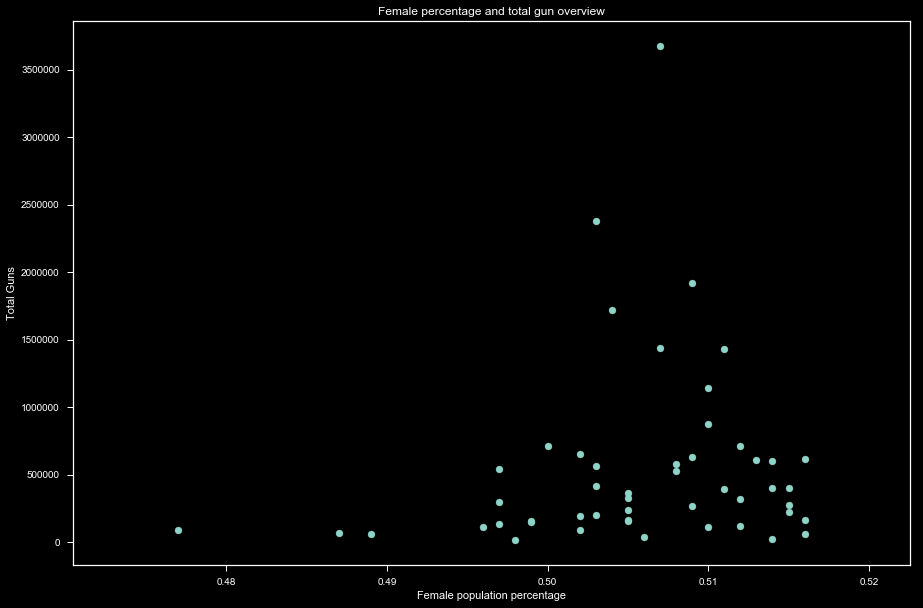

In [105]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print('Correlation betwen females and guns are: ', df_2016.corr()['Female persons']['totals'])

plt.scatter(x = 'Female persons', y = 'totals', data = df_2016)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('Female percentage and total gun overview')
plt.xlabel('Female population percentage')
plt.ylabel('Total Guns')

Correlation betwen white people and guns are:  0.0301778967069978


Text(0,0.5,'Total Guns')

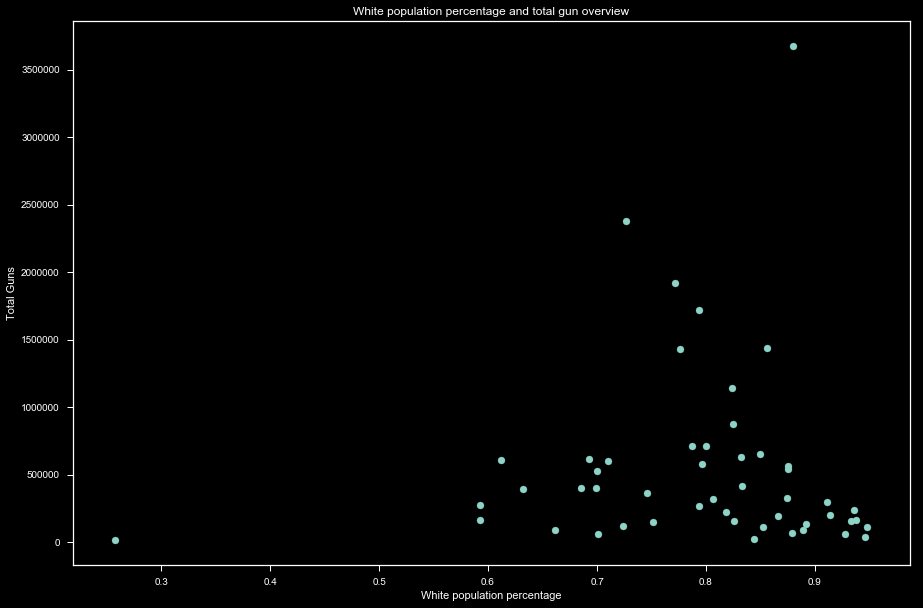

In [106]:
# Change Style since I used Jupyter Lab with a dark background
plt.style.use(['dark_background'])
plt.figure(figsize=(15,10))

print('Correlation betwen white people and guns are: ', df_2016.corr()['White alone']['totals'])

plt.scatter(x = 'White alone', y = 'totals', data = df_2016)
#plt.ticks(x = 'State', y = 'totals', data = gun_2016)
plt.title('White population percentage and total gun overview')
plt.xlabel('White population percentage')
plt.ylabel('Total Guns')

Ethnical or human influences do not seem to affect the the number guns in a state. These measures do not have a correlation.

Population and the housing developments directly affect the number of guns in a state. Those measures have a high correlation

### Limitations of the report

One limitation of the report is that it just stems from two sources. No other data was taken as a reference to check that data.

Nearly no missing data was in the dataset. Therefore, missing data does not influence the report. A simplification was used when the “special” states like District of Columbia were not used in the final report.

In the report the states with the highest and lowest number of guns (in total and in percentage of the population) is listed. Additional statistical analysis would be necessary to figure out if these outcomes were statistically significant.


### Summary

The report shows that the guns in the USA rose since 2004 significantly.  The forecast for 2017 shows that this development seems to continue. The allocation of the guns is very different between the states. There are states with very high number of guns like Kentucky and states with low number of guns like Hawaii. Another finding of the report is that the demography has no influence of the number of guns in a state. Housing and total population has a very high influence of the guns in a state.